In [1]:
import numpy as np
import plotly.express as px
import pandas as pd

In [2]:
df = pd.read_csv('life_expectancy.csv')

In [3]:
df.sample(frac = 0.01)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
386,Bulgaria,2013,Developed,74.1,14.0,1,12.06,149.659879,95.0,14,...,95.0,7.93,95.0,0.1,7674.865590,7.265115e+06,1.9,1.9,0.781,14.4
552,Chile,2007,Developing,78.9,9.0,2,7.39,209.487587,92.0,0,...,95.0,6.35,96.0,0.1,1526.877460,1.649169e+07,0.9,0.9,0.797,14.8
504,Canada,2007,Developing,85.0,74.0,2,8.30,7946.743581,14.0,101,...,9.0,9.83,94.0,0.1,44544.526800,3.288793e+07,0.5,0.4,0.894,15.8
1212,Indonesia,2005,Developing,67.2,19.0,163,0.06,5.381783,65.0,15853,...,79.0,2.79,72.0,0.1,126.928834,2.267127e+07,1.9,1.9,0.629,11.1
2110,Republic of Moldova,2008,Developing,68.9,228.0,1,9.07,0.000000,97.0,0,...,96.0,11.41,9.0,0.1,NaN,NaN,2.9,3.1,NaN,NaN
2705,Turkmenistan,2007,Developing,64.1,241.0,6,2.58,0.358651,98.0,59,...,98.0,2.16,98.0,0.1,26.371428,4.871370e+05,3.3,3.3,0.000,10.4
1837,Netherlands,2007,Developed,82.0,68.0,1,9.53,9689.732784,NaN,10,...,97.0,9.36,97.0,0.1,51241.315620,1.638170e+07,1.0,1.0,0.899,16.6
1864,Nicaragua,2012,Developing,73.9,157.0,2,3.63,334.817425,98.0,0,...,99.0,8.40,98.0,0.1,1792.384500,5.877180e+05,1.8,1.7,0.625,11.5
2404,South Africa,2004,Developing,53.7,497.0,55,6.96,622.043809,76.0,830,...,73.0,7.93,74.0,29.7,4863.516880,4.717990e+03,12.6,15.0,0.611,12.9
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.000000,62.0,628,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN


In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df = pd.DataFrame(df)

# Assuming df_main should be a copy of df before interpolation (if needed)
df_main = df.copy()

# Interpolating specific columns
filled_col = df[['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B']].interpolate()

# Correctly assigning interpolated columns back to df_main
df_main['Life expectancy '] = filled_col['Life expectancy ']
df_main['Adult Mortality'] = filled_col['Adult Mortality']
df_main['Alcohol'] = filled_col['Alcohol']
df_main['Hepatitis B'] = filled_col['Hepatitis B']

print(df_main)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

### TASK 1


### TASK 2: PLOT CHART

In [6]:
freq_table = pd.pivot_table(df_main, index='Year', columns= 'Status', aggfunc='size')
print(freq_table)

Status  Developed  Developing
Year                         
2000           32         151
2001           32         151
2002           32         151
2003           32         151
2004           32         151
2005           32         151
2006           32         151
2007           32         151
2008           32         151
2009           32         151
2010           32         151
2011           32         151
2012           32         151
2013           32         161
2014           32         151
2015           32         151


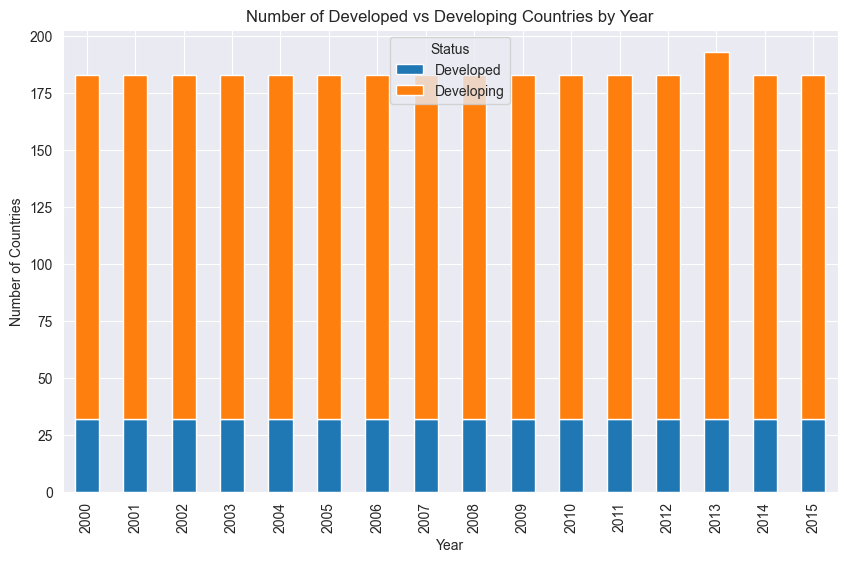

In [7]:
import matplotlib.pyplot as plt

# Plotting
freq_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Developed vs Developing Countries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Status')
plt.show()


Frequency Table:
Status
Developing    2426
Developed      512
Name: count, dtype: int64


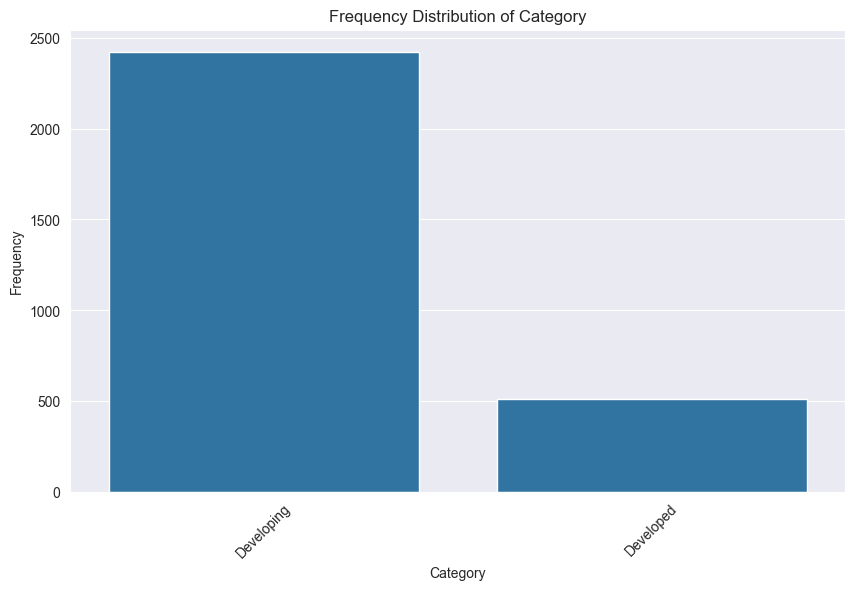

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Category' is your categorical column
category_counts = df_main['Status'].value_counts()

# Print frequency table
print("Frequency Table:")
print(category_counts)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Frequency Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the labels if they overlap
plt.show()


In [9]:
df_main.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


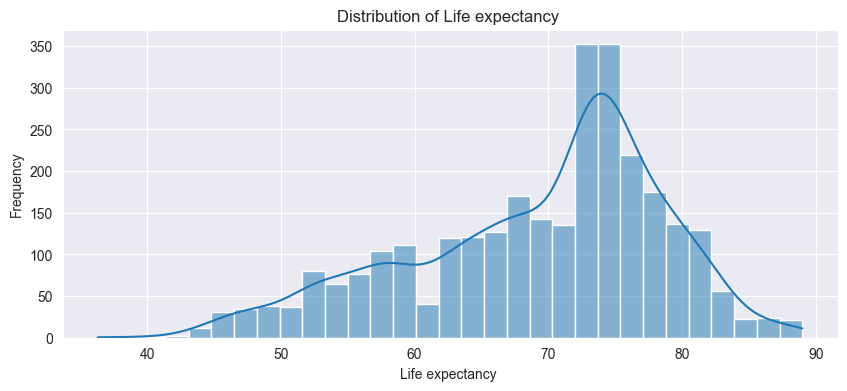

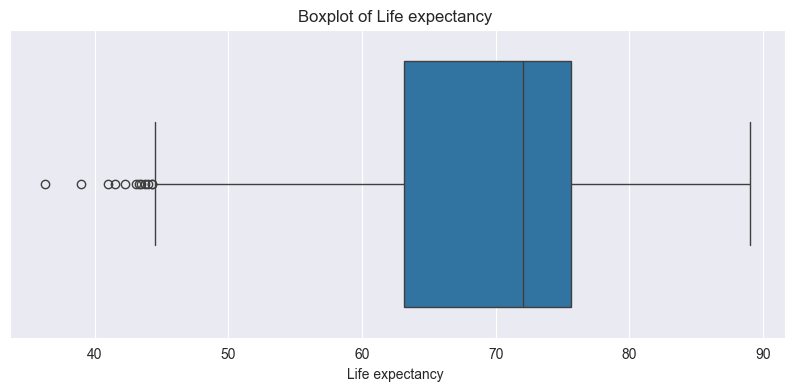

Summary statistics for Life expectancy :
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


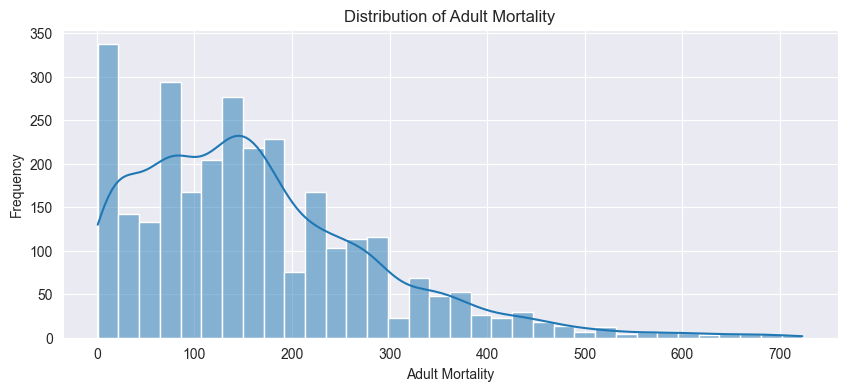

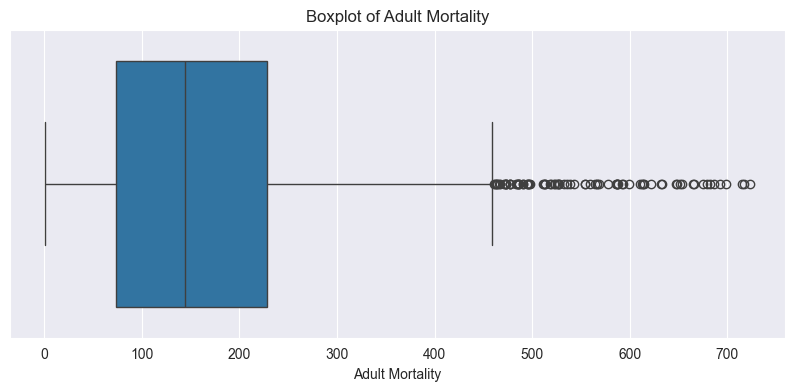

Summary statistics for Adult Mortality:
count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64


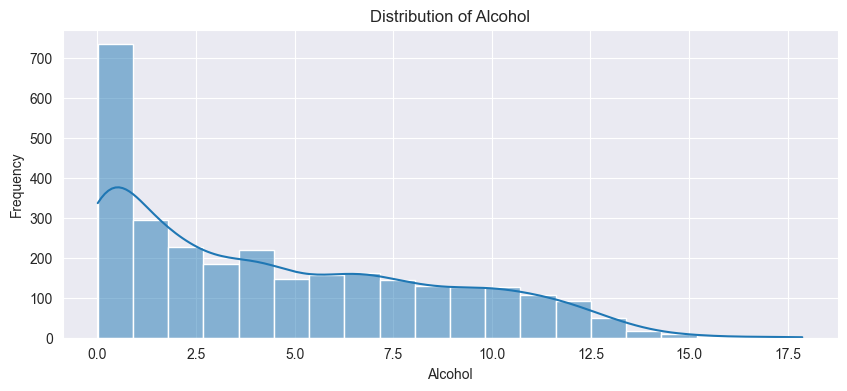

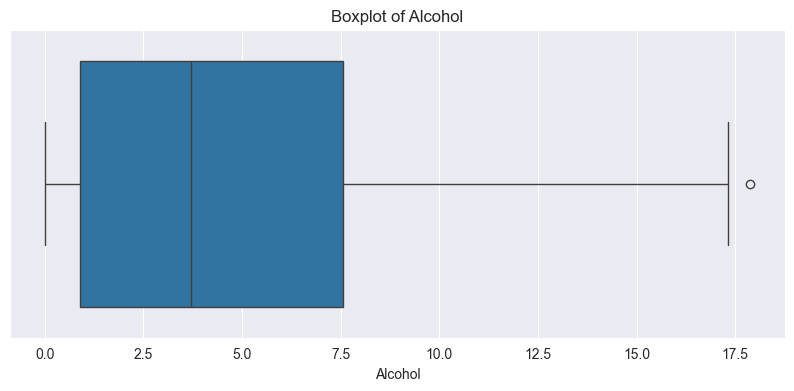

Summary statistics for Alcohol:
count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol, dtype: float64


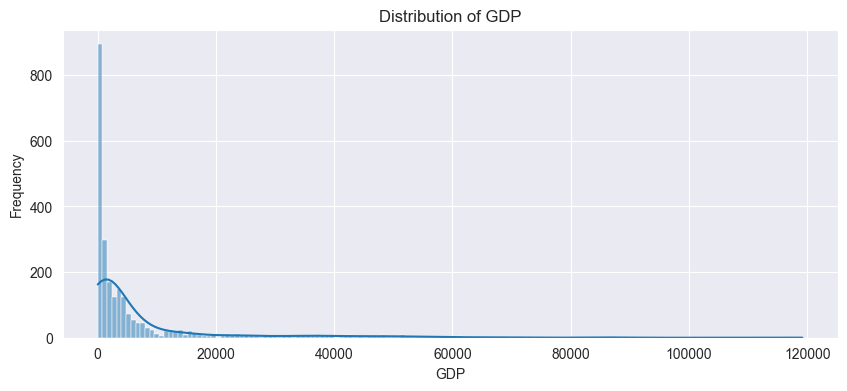

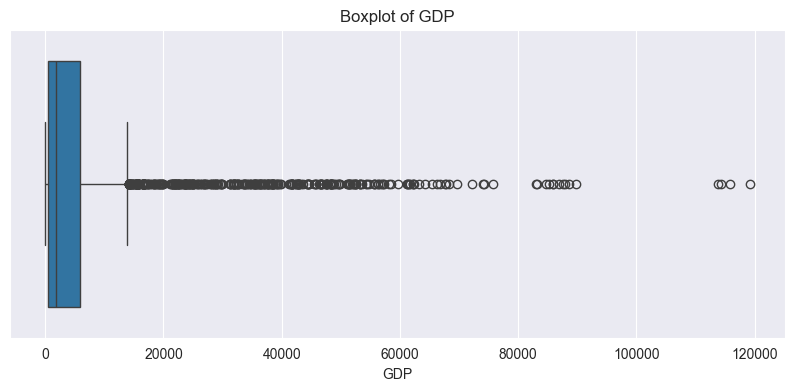

Summary statistics for GDP:
count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: GDP, dtype: float64


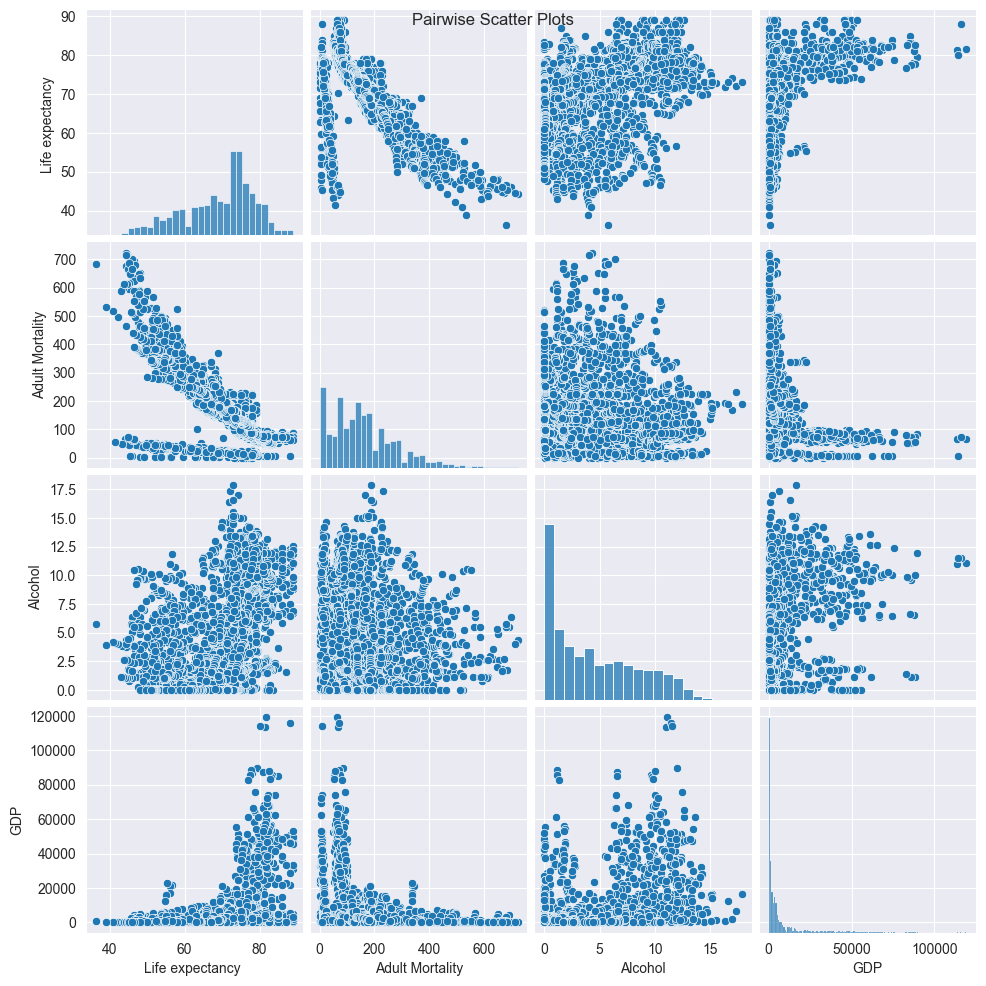

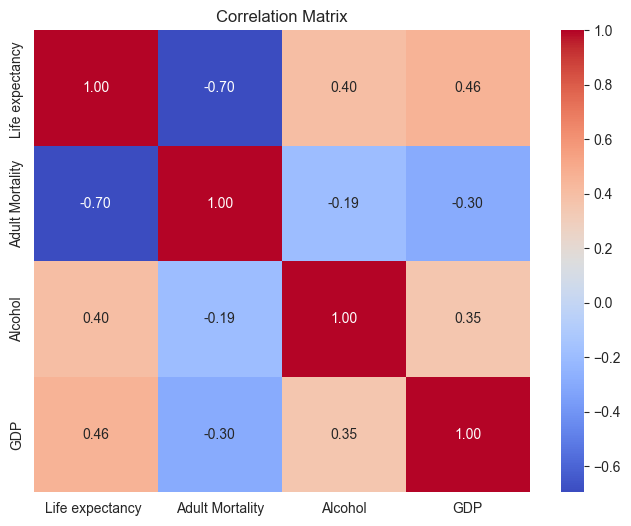

In [10]:
# Selecting quantitative variables
quantitative_vars = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'GDP']

# Plot histograms and calculate summary statistics for each quantitative variable
for var in quantitative_vars:
    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_main[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_main[var])
    plt.title(f'Boxplot of {var}')
    plt.show()
    
    # Summary statistics
    print(f"Summary statistics for {var}:\n{df[var].describe()}\n")

# Pairwise scatter plots
sns.pairplot(df_main[quantitative_vars])
plt.suptitle('Pairwise Scatter Plots')
plt.show()

# Correlation matrix heatmap
corr_matrix = df_main[quantitative_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
print(df_main.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


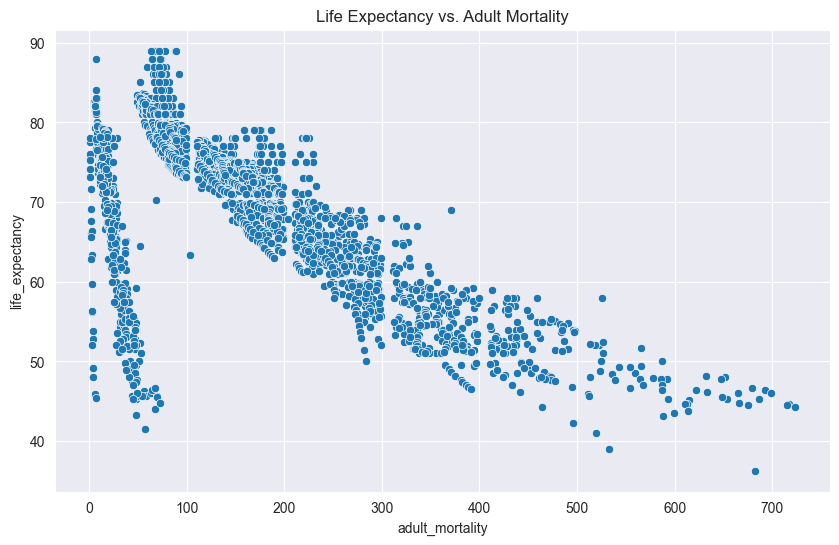

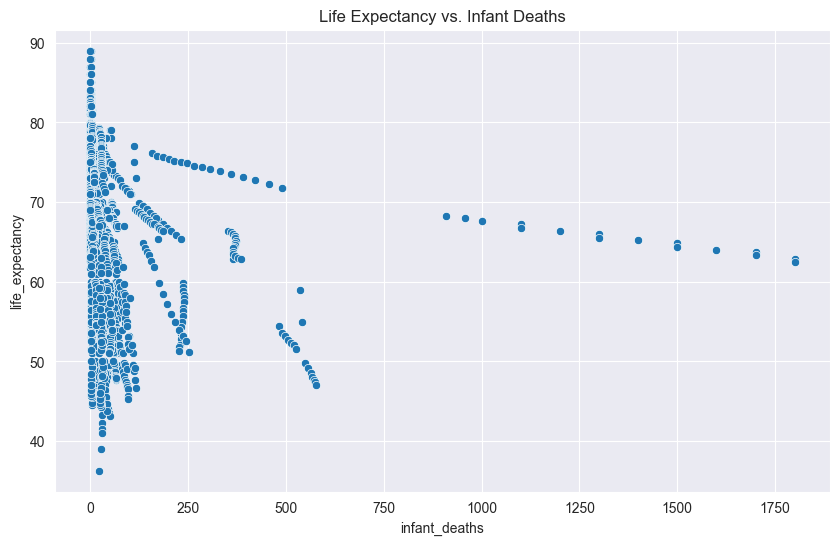

In [17]:
# Remove trailing spaces and standardize capitalization
df_main.columns = df_main.columns.str.strip().str.replace(' ', '_').str.lower()

# Check new column names
print(df_main.columns)

# After renaming, your plot code would look cleaner:
# Scatter plot of Adult Mortality vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='adult_mortality', y='life_expectancy')
plt.title('Life Expectancy vs. Adult Mortality')
plt.show()

# Scatter plot of Infant Deaths vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='infant_deaths', y='life_expectancy')
plt.title('Life Expectancy vs. Infant Deaths')
plt.show()


In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Life Expectancy: Actual vs Predicted')
plt.show()
